In [18]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 147.8 kB/s eta 0:00:02
   ------------------ ------------------- 143.4/294.9 kB 266.2 kB/s eta 

In [10]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('P2- OfficeSupplies Data.csv')

df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


Sales Analysis:

a) What are the total sales for each product category?


In [11]:
# Calculate total sales
df['Total Sales'] = df['Units'] * df['Unit Price']

# Group by Item and sum the total sales
total_sales_by_category = df.groupby('Item')['Total Sales'].sum().sort_values()

print("Total sales for each product category:")
print(total_sales_by_category)

Total sales for each product category:
Item
Desk       1700.00
Pen        2045.22
Pencil     2135.14
Pen Set    4169.87
Binder     9577.65
Name: Total Sales, dtype: float64


b) Which product category has the highest sales?

In [25]:
highest_sales_category = total_sales_by_category.index[-1]
highest_sales_amount = total_sales_by_category.iloc[-1]

print(f"The product category with the highest sales is: {highest_sales_category}")
print(f"Total sales amount: ${highest_sales_amount:.2f}")

The product category with the highest sales is: Binder
Total sales amount: $9577.65


c) Identify the top 10 best-selling products.

In [16]:
top_10_by_units = df.groupby('Item')['Units'].sum().sort_values().head(10)

print("\nTop 10 best-selling products by units sold:")
print(top_10_by_units)

# Identify top 10 best-selling products by total sales
top_10_by_sales = df.groupby('Item')['Total Sales'].sum().sort_values().head(10)

print("\nTop 10 best-selling products by total sales:")
print(top_10_by_sales)


Top 10 best-selling products by units sold:
Item
Desk        10
Pen        278
Pen Set    395
Pencil     716
Binder     722
Name: Units, dtype: int64

Top 10 best-selling products by total sales:
Item
Desk       1700.00
Pen        2045.22
Pencil     2135.14
Pen Set    4169.87
Binder     9577.65
Name: Total Sales, dtype: float64


In [12]:
df.Item.unique()

array(['Pen Set', 'Binder', 'Pencil', 'Desk', 'Pen'], dtype=object)

Customer Analysis:

a) Who are the top 10 customers by sales?

In [14]:
# Group by Rep (customer) and sum the total sales
top_10_customers = df.groupby('Rep')['Total Sales'].sum().sort_values().head(10)

print("Top 10 customers by sales:")
print(top_10_customers)

Top 10 customers by sales:
Rep
Rachel      438.37
Nick        536.75
Thomas     1203.11
James      1283.61
Morgan     1387.77
Smith      1641.43
Bill       1749.87
Richard    2363.04
Alex       2812.19
Susan      3102.30
Name: Total Sales, dtype: float64


b) What is the total number of unique customers?

In [17]:
# Count unique customers
unique_customers = df['Rep'].nunique()

print(f"\nTotal number of unique customers: {unique_customers}")

# Analyze purchase frequency
purchase_frequency = df['Rep'].value_counts()
average_frequency = purchase_frequency.mean()
median_frequency = purchase_frequency.median()

print("\nCustomer purchase frequency:")
print(purchase_frequency)
print(f"\nAverage purchase frequency: {average_frequency:.2f}")
print(f"Median purchase frequency: {median_frequency:.2f}")


Total number of unique customers: 11

Customer purchase frequency:
Rep
Richard    8
Bill       5
Alex       5
Rachel     4
James      4
Matthew    4
Morgan     3
Smith      3
Susan      3
Nick       2
Thomas     2
Name: count, dtype: int64

Average purchase frequency: 3.91
Median purchase frequency: 4.00


C:\Users\hp\AppData\Local\Temp\ipykernel_8048\2155012688.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette="viridis")


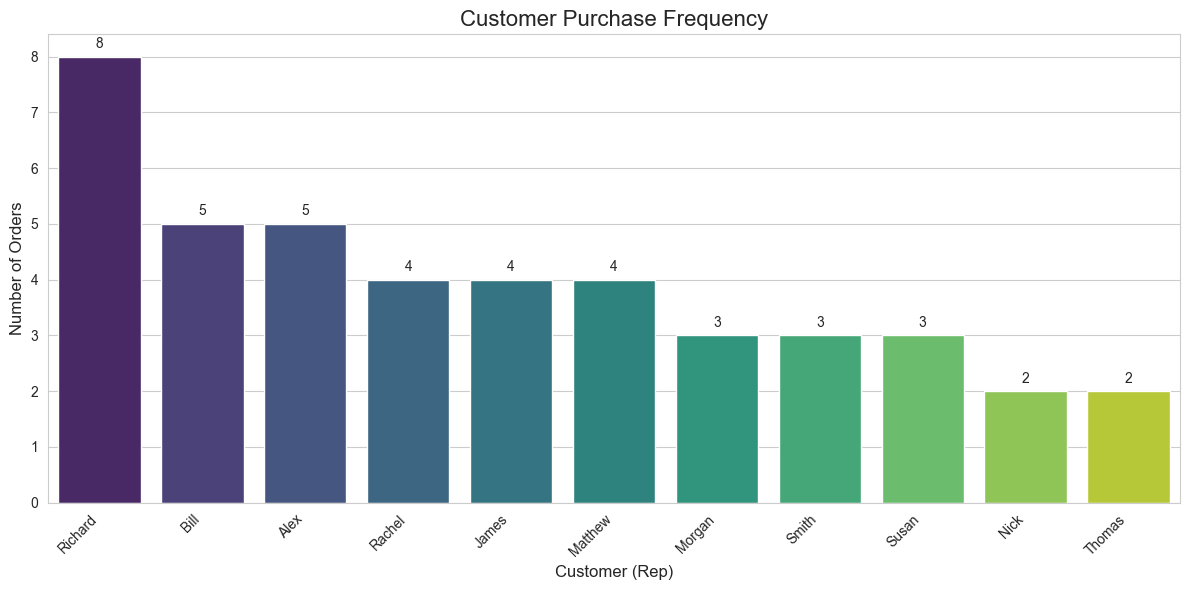

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate purchase frequency
purchase_frequency = df['Rep'].value_counts().sort_values(ascending=False)

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette="viridis")

# Customize the plot
plt.title("Customer Purchase Frequency", fontsize=16)
plt.xlabel("Customer (Rep)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(purchase_frequency.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Time Series Analysis:

* What are the monthly sales trends over the past year?
* Identify any seasonal patterns in the sales data.

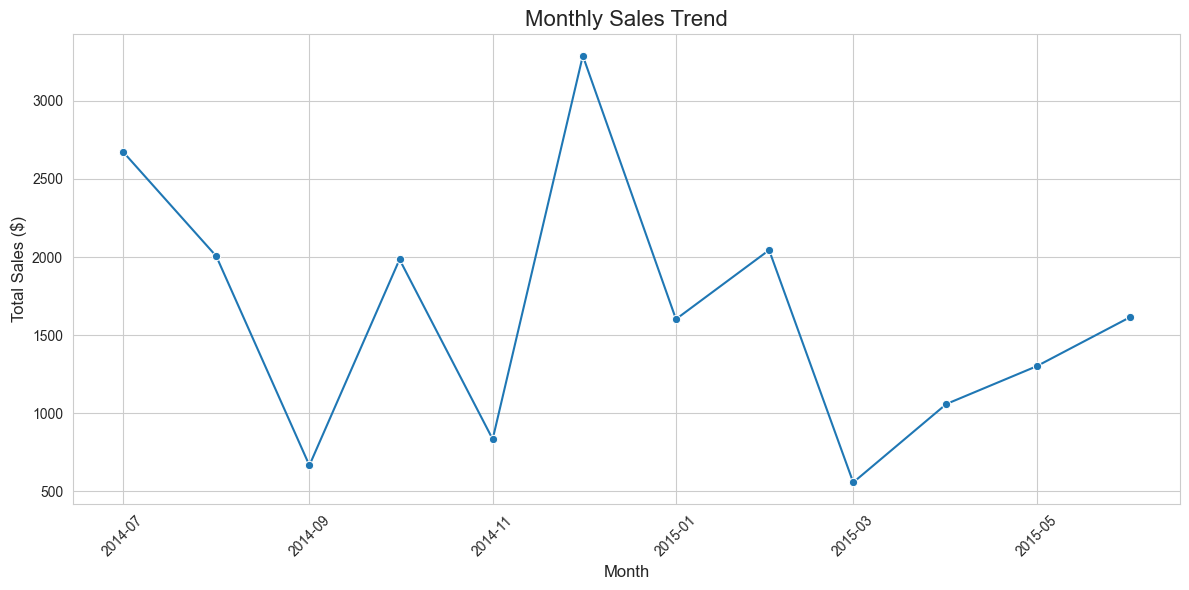

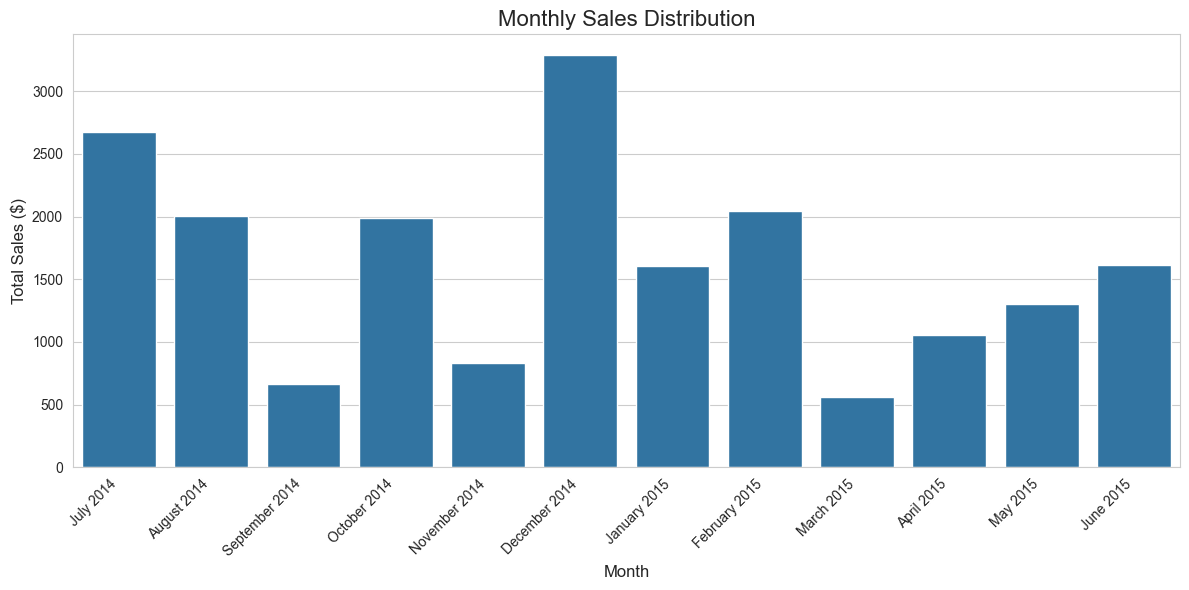

Monthly sales data:
    OrderDate  Total Sales
0  2014-07-01      2673.23
1  2014-08-01      2005.55
2  2014-09-01       666.11
3  2014-10-01      1984.57
4  2014-11-01       833.78
5  2014-12-01      3288.47
6  2015-01-01      1602.09
7  2015-02-01      2044.33
8  2015-03-01       556.87
9  2015-04-01      1059.03
10 2015-05-01      1300.35
11 2015-06-01      1613.50


In [20]:
# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%b-%y')

# Calculate total sales
df['Total Sales'] = df['Units'] * df['Unit Price']

# Group by month and calculate total sales
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Total Sales'].sum().reset_index()
monthly_sales['OrderDate'] = monthly_sales['OrderDate'].dt.to_timestamp()

# Sort by date
monthly_sales = monthly_sales.sort_values('OrderDate')

# Plot monthly sales trend (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderDate', y='Total Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot monthly sales as bar plot for better visualization of patterns
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales['OrderDate'].dt.strftime('%B %Y'), y='Total Sales', data=monthly_sales)
plt.title('Monthly Sales Distribution', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Monthly sales data:")
print(monthly_sales)

Geographical Analysis:

* Which regions generate the most sales?
* What are the sales trends across different regions?

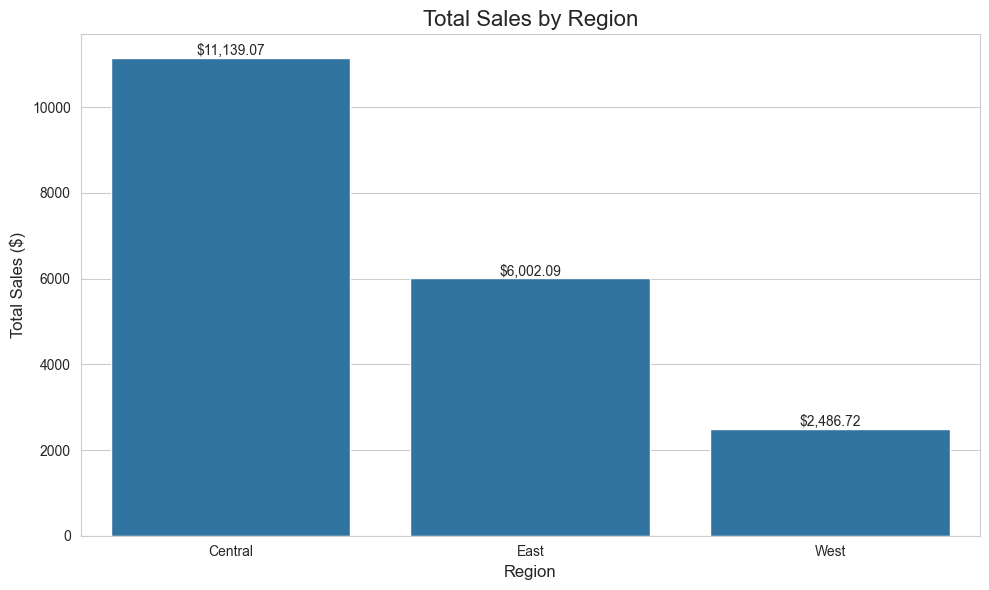

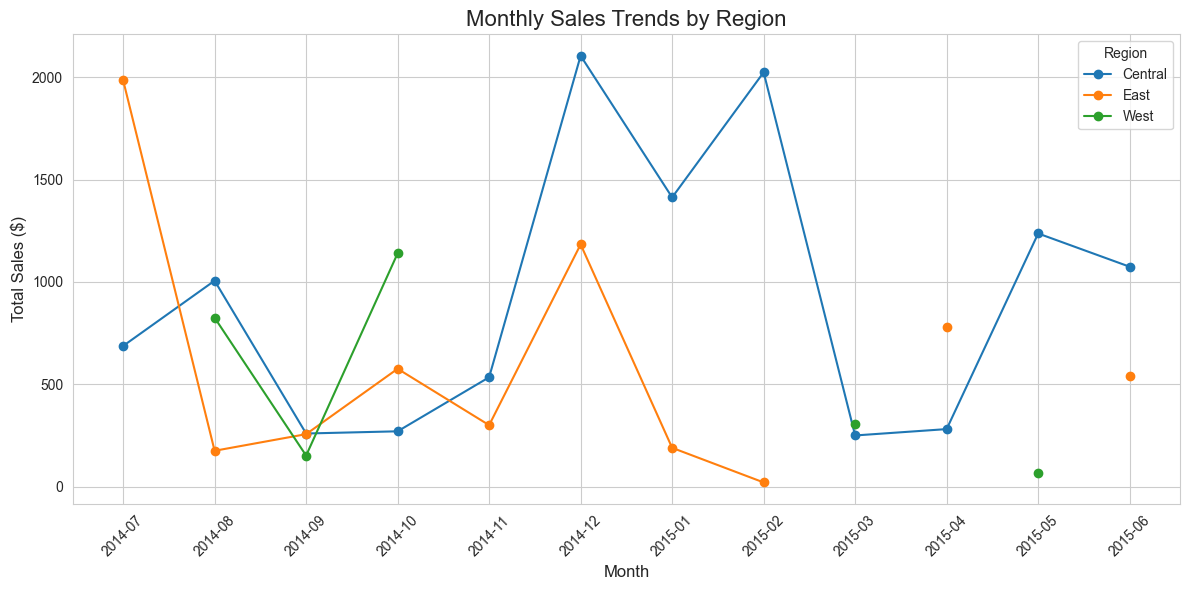

Total sales by region:
Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64

Monthly sales by region:
Region     Central     East     West
OrderDate                           
2014-07     686.95  1986.28      NaN
2014-08    1005.90   174.65   825.00
2014-09     259.03   255.84   151.24
2014-10     269.78   575.36  1139.43
2014-11     533.93   299.85      NaN
2014-12    2105.21  1183.26      NaN
2015-01    1413.04   189.05      NaN
2015-02    2024.37    19.96      NaN
2015-03     249.50      NaN   307.37
2015-04     280.59   778.44      NaN
2015-05    1236.67      NaN    63.68
2015-06    1074.10   539.40      NaN


In [21]:
# Group by Region and calculate total sales
regional_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

# Create a bar plot of regional sales
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
for i, v in enumerate(regional_sales.values):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Group by Region and Month, then calculate total sales
monthly_regional_sales = df.groupby([df['OrderDate'].dt.to_period('M'), 'Region'])['Total Sales'].sum().unstack()

# Plot monthly sales trends by region
plt.figure(figsize=(12, 6))
for region in monthly_regional_sales.columns:
    plt.plot(monthly_regional_sales.index.astype(str), monthly_regional_sales[region], marker='o', label=region)

plt.title('Monthly Sales Trends by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total sales by region:")
print(regional_sales)

print("\nMonthly sales by region:")
print(monthly_regional_sales)

Profit Analysis:

* What is the total profit for each product category?
* Identify the top 10 most profitable products.

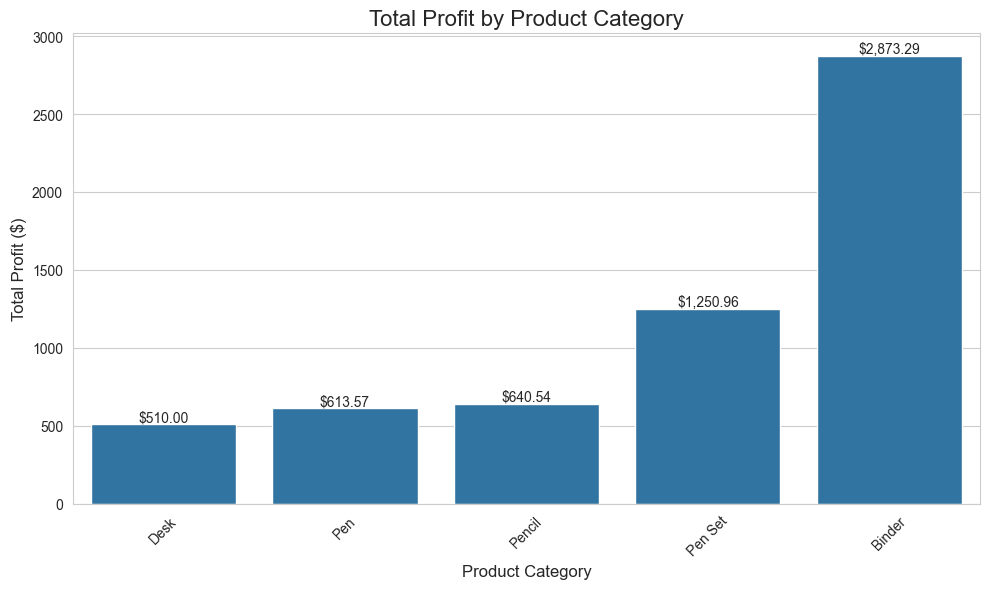

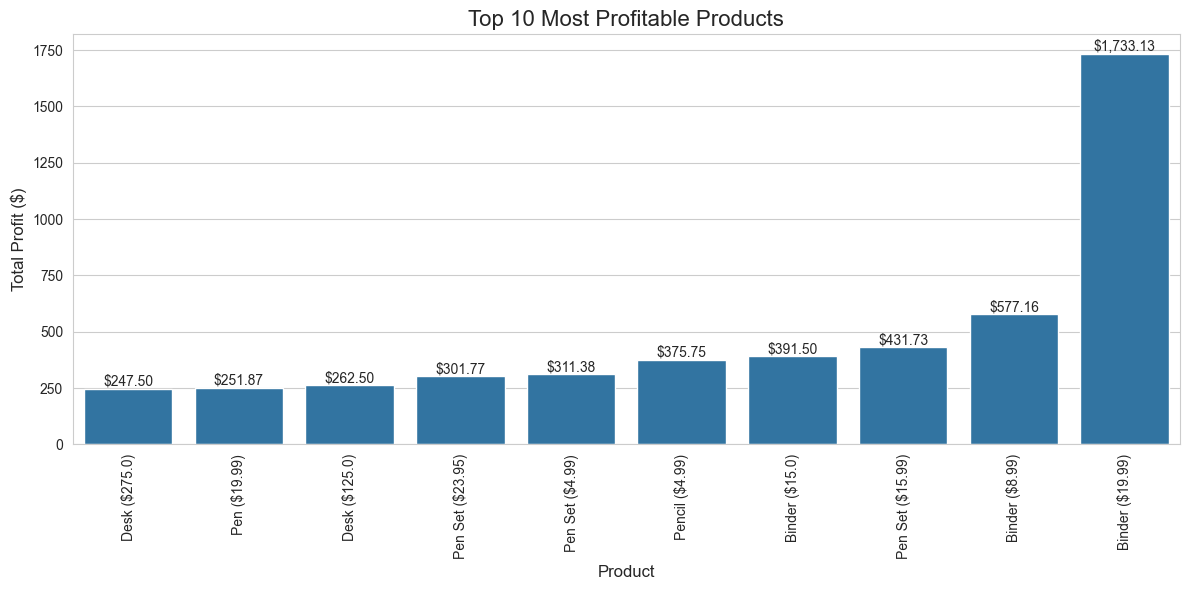

Top 10 most profitable products:
Product
Desk ($275.0)        247.500
Pen ($19.99)         251.874
Desk ($125.0)        262.500
Pen Set ($23.95)     301.770
Pen Set ($4.99)      311.376
Pencil ($4.99)       375.747
Binder ($15.0)       391.500
Pen Set ($15.99)     431.730
Binder ($8.99)       577.158
Binder ($19.99)     1733.133
Name: Profit, dtype: float64


In [22]:
# Assume a 30% profit margin
df['Profit'] = df['Total Sales'] * 0.3

# Calculate total profit by product category
profit_by_category = df.groupby('Item')['Profit'].sum().sort_values()

# Create a bar plot of profit by category
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values)
plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(profit_by_category.values):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Calculate profit for each unique product
df['Product'] = df['Item'] + ' ($' + df['Unit Price'].astype(str) + ')'
profit_by_product = df.groupby('Product')['Profit'].sum().sort_values()

# Display top 10 most profitable products
top_10_profitable_products = profit_by_product.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_profitable_products.index, y=top_10_profitable_products.values)
plt.title('Top 10 Most Profitable Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=90)
for i, v in enumerate(top_10_profitable_products.values):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print("Top 10 most profitable products:")
print(top_10_profitable_products)